# Heart Failure Prediction Analysis

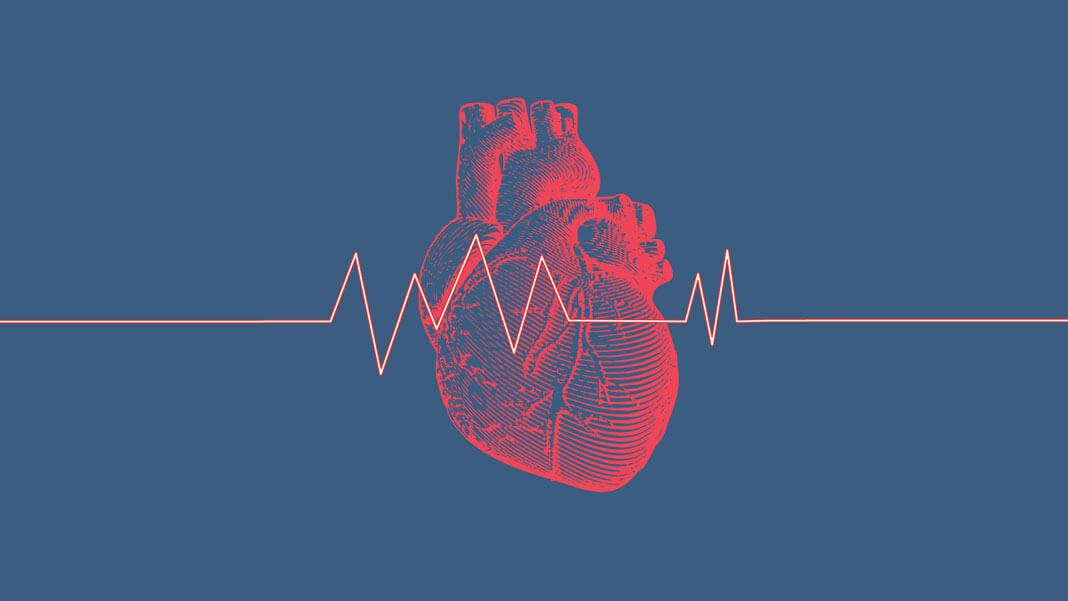

In [39]:
import numpy as np
import pandas as pd
from sklearn import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

### Dataset

> **https://www.kaggle.com/sulianova/cardiovascular-disease-dataset** 

### Reading the dataset

In [2]:
df = pd.read_csv("cardio_train.csv", sep=';')
df = df.drop(['id'], axis=1)
df['age'] = (df['age'] // 365)
_, df = model_selection.train_test_split(df, test_size=0.05, random_state=1234)
to_per = lambda a: round(a*100, 2)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
27504,57,1,164,65.0,120,80,1,1,0,0,1,1
57935,54,1,165,66.0,12,80,1,1,0,0,1,0
40387,47,1,161,77.0,130,90,1,1,0,0,1,1
24455,62,2,170,78.0,140,90,1,2,1,0,1,1
66362,42,2,178,70.0,120,80,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40669,64,2,174,74.0,140,90,1,1,0,0,1,1
33419,43,1,163,86.0,130,80,2,2,0,0,1,1
6845,49,1,161,59.0,120,80,3,1,0,0,1,0
32499,54,1,156,64.0,110,80,1,1,0,0,1,0


In [3]:
print("Shape of the dataset:",df.shape)

Shape of the dataset: (3500, 12)


### Summarization

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
27504,57,1,164,65.0,120,80,1,1,0,0,1,1
57935,54,1,165,66.0,12,80,1,1,0,0,1,0
40387,47,1,161,77.0,130,90,1,1,0,0,1,1
24455,62,2,170,78.0,140,90,1,2,1,0,1,1
66362,42,2,178,70.0,120,80,1,1,1,1,1,0


In [5]:
df.describe(include="all")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,52.642000,1.344000,164.511714,74.530800,126.964857,94.150571,1.360000,1.240286,0.090857,0.054571,0.791429,0.486571
std,6.705166,0.475109,8.379887,14.857876,21.519690,168.978761,0.680097,0.584872,0.287447,0.227174,0.406345,0.499891
min,39.000000,1.000000,68.000000,28.000000,11.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,197.000000,180.000000,806.000000,8099.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Data Exploration

#### Number of Unique values belonging to each feature

In [6]:
n = df.nunique(axis=0)
n

age             26
gender           2
height          59
weight         116
ap_hi           54
ap_lo           46
cholesterol      3
gluc             3
smoke            2
alco             2
active           2
cardio           2
dtype: int64

#### Gender Distribution

In [7]:
df['gender'].value_counts()

1    2296
2    1204
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Distribution of Genders (1 - Female; 2 - Male)'}, xlabel='Gender', ylabel='Number of Occurences'>

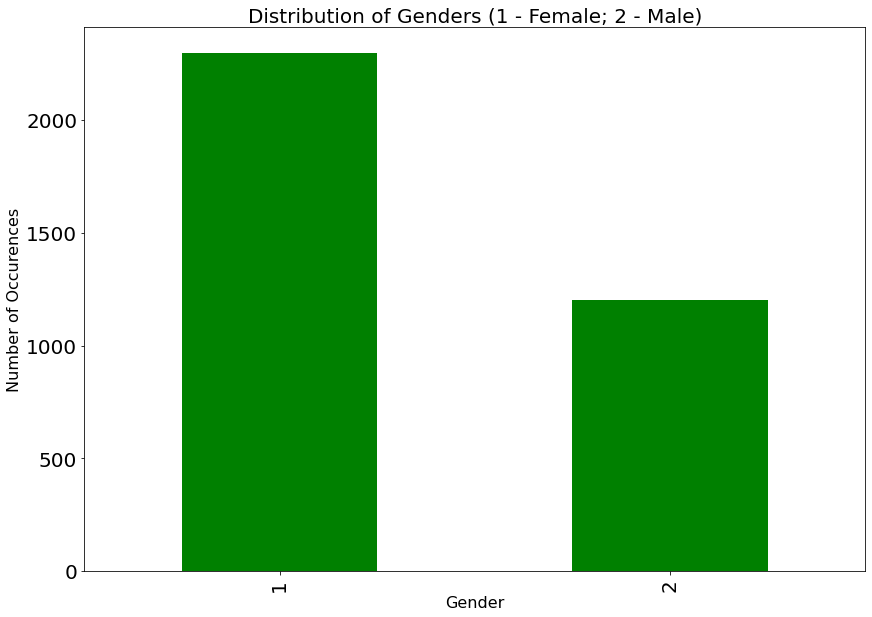

In [8]:
fig, ax = plt.subplots(figsize = (14, 10))
ax.set_title('Distribution of Genders (1 - Female; 2 - Male)', fontsize = 20)
ax.set_xlabel("Gender", fontsize = 16)
ax.set_ylabel("Number of Occurences", fontsize = 16)
df["gender"].value_counts().plot(ax = ax, kind = "bar", color = "green")

#### Cardio Graph over the age (Years)

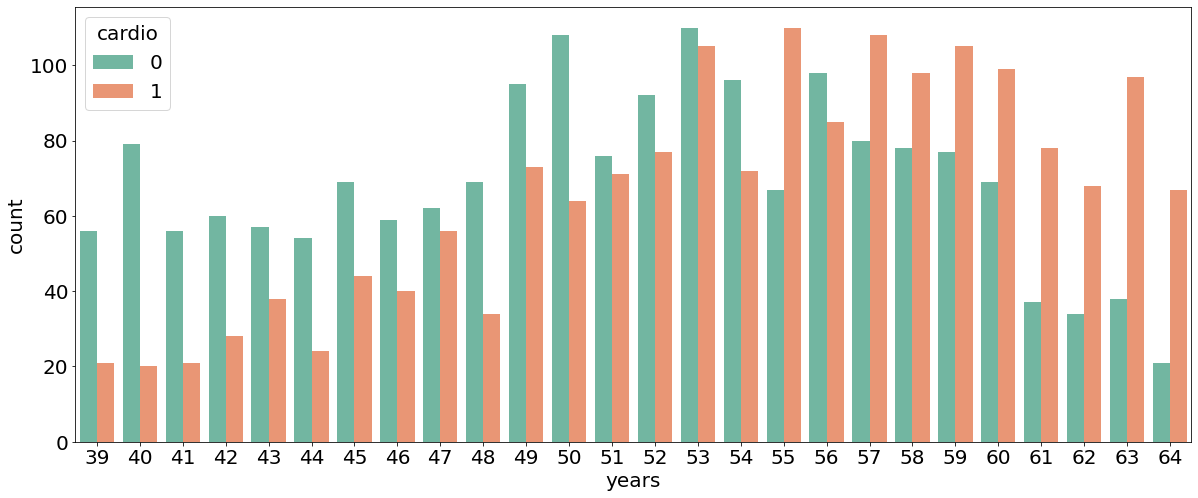

In [20]:
plt.rcParams['figure.figsize'] = 20, 8
df['years'] = (df['age']).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

#### Scatterplot showing high blood pressure variance with age

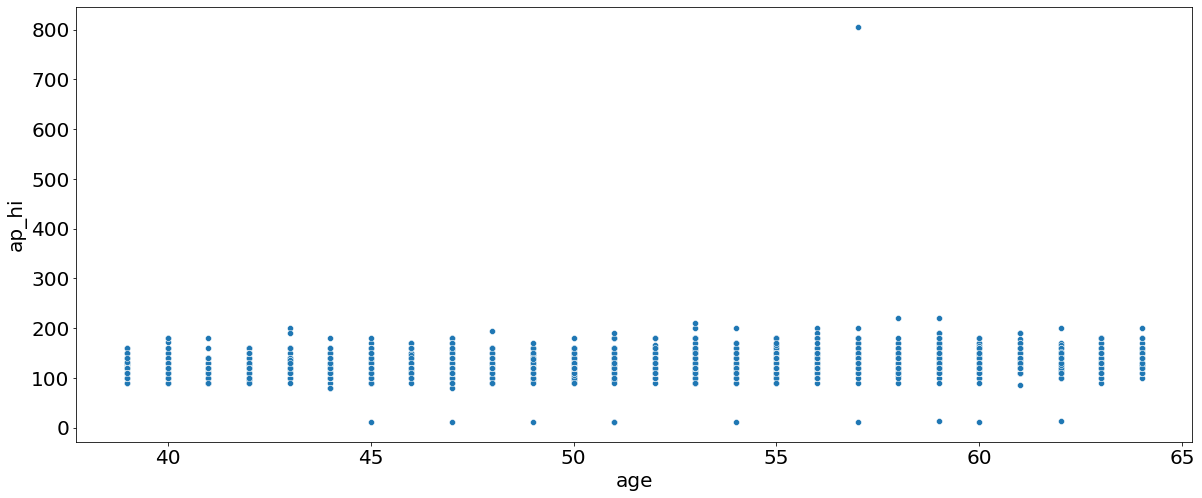

In [40]:
ax = sns.scatterplot(x="age", y="ap_hi",  data=df)

#### Comparing the average age of people with CVD & the average age of healthy people.

In [21]:
df.groupby('cardio')['age'].mean()

cardio
0    51.087368
1    54.282443
Name: age, dtype: float64

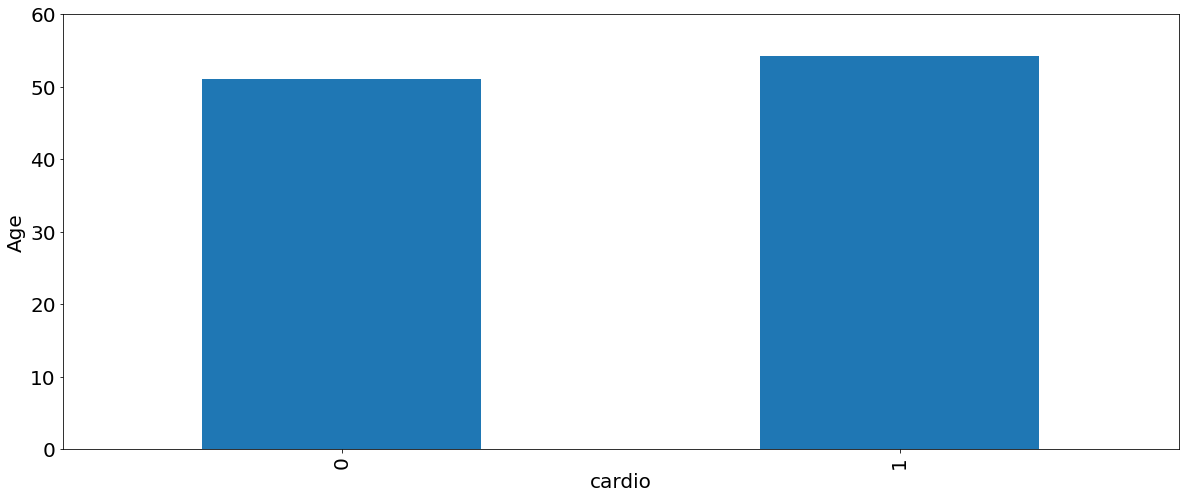

In [22]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylim(0,60)
plt.ylabel('Age')
plt.show();

#### Number of Smokers(1) and Non-Smokers(0)

In [23]:
df['smoke'].value_counts()

0    3182
1     318
Name: smoke, dtype: int64

#### Average age of people with CVD who are also smokers

In [24]:
df[(df['smoke'] == 1) & (df['cardio'] == 1)]['age'].mean()

52.64492753623188

### Boxplots

#### Boxplot Representation of Age & Weight features

<AxesSubplot:xlabel='age'>

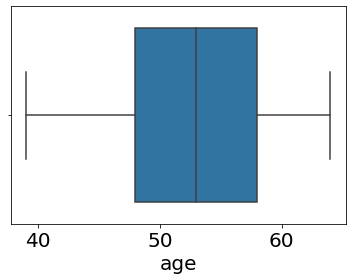

In [17]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='weight'>

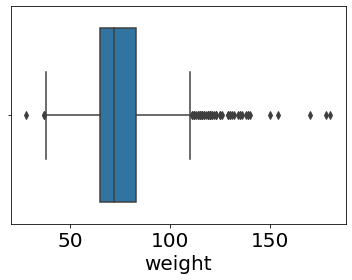

In [18]:
sns.boxplot(df['weight'])

### Model Fitting & Evaluation

In [9]:
models = {
		"KNN": 					lambda x, y: neighbors.KNeighborsClassifier(n_neighbors=5).fit(x, y),
		"Logistic Regression": 	lambda x, y: linear_model.LogisticRegression().fit(x, y),
		"SVM": 					lambda x, y: svm.SVC().fit(x, y),
}

In [10]:
def kfold(x, y, func, val = 5):
    models = []
    kf = model_selection.KFold(n_splits=val)
    for idx in kf.split(x):
        KNN = func(x[idx[0]], y[idx[0]])
        models += [[KNN, metrics.accuracy_score(y[idx[1]], KNN.predict(x[idx[1]]))]]
    return sorted(models, key=lambda a: a[1])[-1]

In [11]:
y = (df['cardio']).to_numpy(dtype='float64')
X = df.drop(labels='cardio', axis=1)
x = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=420)

In [12]:
model_scores, model = [], []
for name, fn in models.items():
    best_model, best_out = kfold(X_train, Y_train, fn)
    Y_pred = best_model.predict(X_test)
    model_scores += [to_per(metrics.accuracy_score(Y_test, Y_pred))]
    model += [best_model]
    print(f"score: \t{model_scores[-1]}% {name}")

score: 	69.57% KNN
score: 	73.71% Logistic Regression
score: 	73.29% SVM


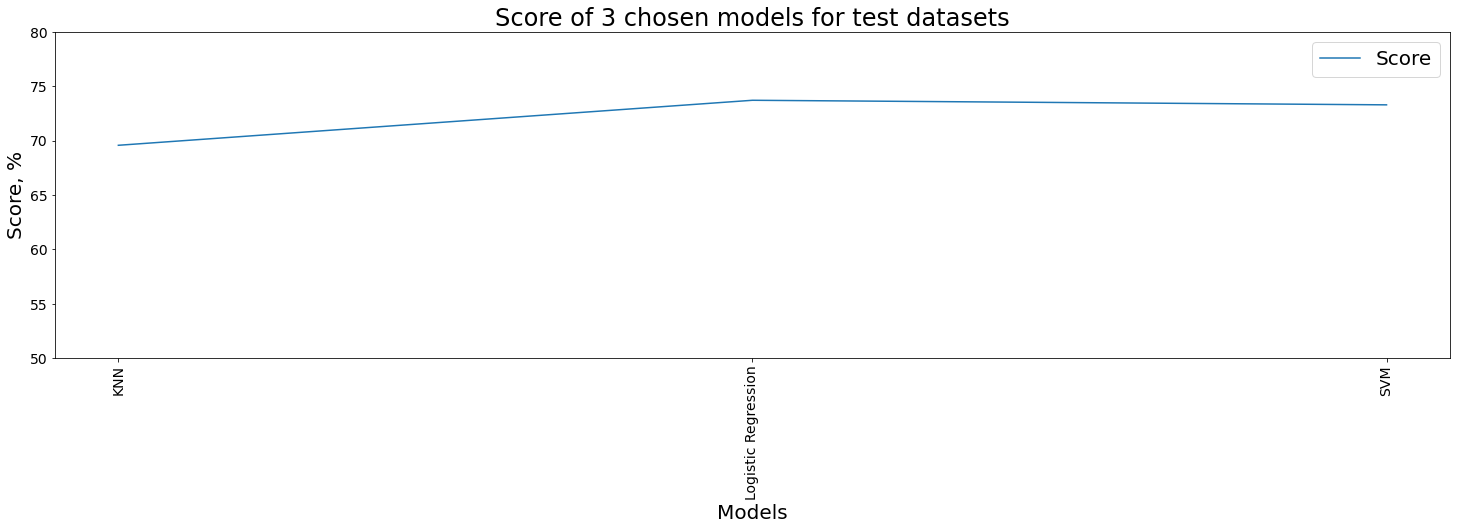

In [13]:
plt.figure(figsize=[25,6])
xx = list(models.keys())
plt.tick_params(labelsize=14)
plt.plot(xx, model_scores, label = 'Score')
plt.ylim([50, 80])
plt.legend()
plt.title('Score of 3 chosen models for test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()

### Feature Importance

In [16]:
print(pd.DataFrame({'feature': X.columns, 'weight': model[1].coef_[0]}))

        feature    weight
0           age  0.371671
1        gender  0.013468
2        height  0.010407
3        weight  0.236558
4         ap_hi  1.162477
5         ap_lo -0.043142
6   cholesterol  0.407737
7          gluc -0.155259
8         smoke -0.139625
9          alco  0.022211
10       active -0.018056


Text(0, 0.5, 'Score, %')

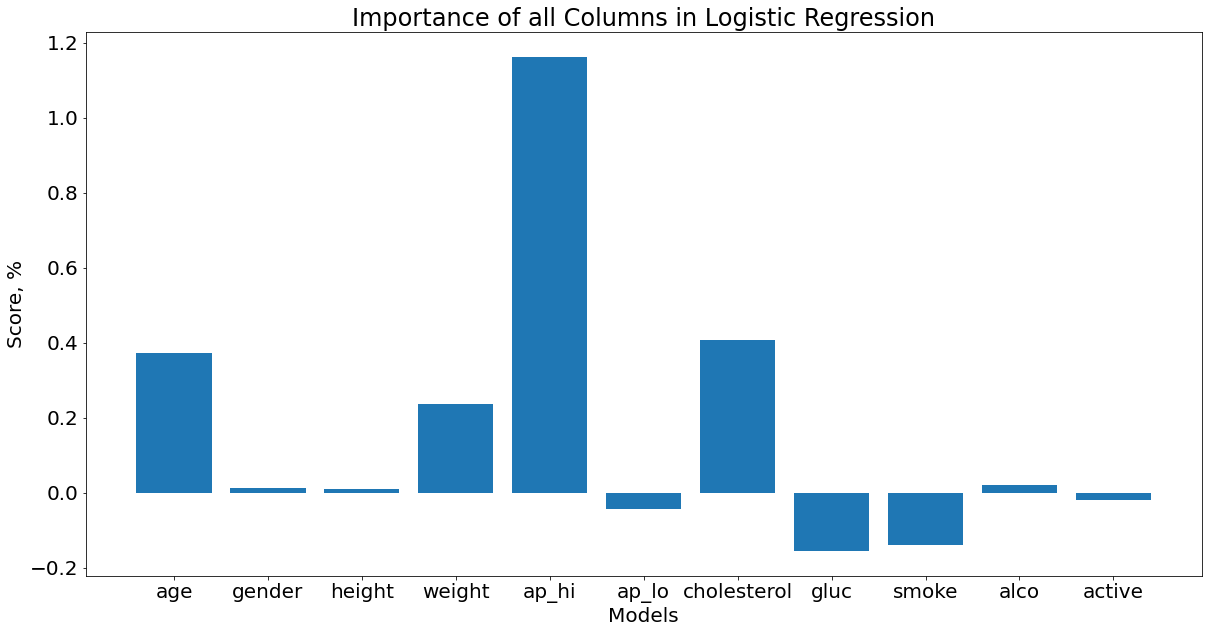

In [15]:
plt.figure(figsize=(20, 10))
plt.bar(X.columns, model[1].coef_[0])
plt.title('Importance of all Columns in Logistic Regression')
plt.xlabel('Models')
plt.ylabel('Score, %')